In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

from shapely.geometry import Point, Polygon
from datetime import datetime

In [2]:
# Read in prepped csv files
lis = pd.read_csv('./data/prepped/lis.csv')
cal = pd.read_csv('./data/raw/calendar.csv')

In [3]:
cal.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [4]:
cal['is_available'] = np.where(cal['available'] == 't', 1, 0)

In [5]:
cal['datetime'] = cal.date.apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

In [6]:
cal.head()

,listing_id,date,available,price,is_available,datetime
0,241032,2016-01-04,t,$85.00,1,2016-01-04
1,241032,2016-01-05,t,$85.00,1,2016-01-05
2,241032,2016-01-06,f,NaN,0,2016-01-06
3,241032,2016-01-07,f,NaN,0,2016-01-07
4,241032,2016-01-08,f,NaN,0,2016-01-08


In [7]:
cal_by_datetime = cal.groupby(['datetime'], as_index = False).sum()

# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     display(cal_by_datetime)

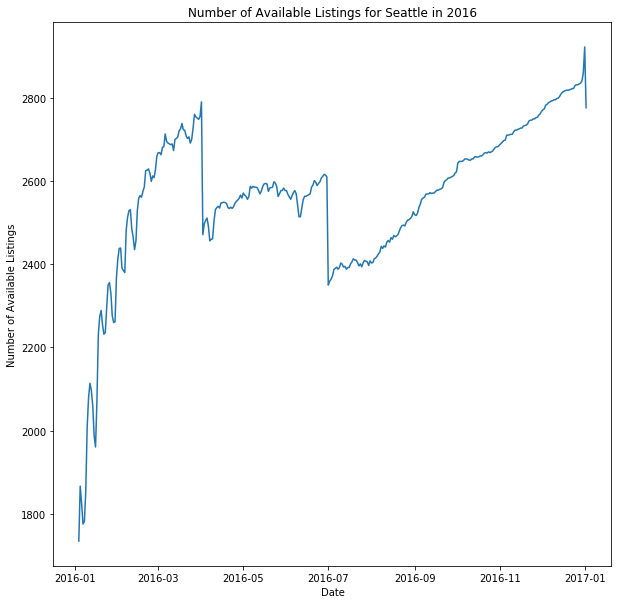

In [8]:
fig_num_listings_by_date = plt.figure(figsize = (10, 10))
plt.plot(cal_by_datetime.datetime.dt.to_pydatetime(), cal_by_datetime['is_available'])
plt.xlabel('Date')
plt.ylabel('Number of Available Listings')
plt.title('Number of Available Listings for Seattle in 2016')
plt.show()

In [9]:
lis.neighbourhood.unique()

array(['Queen Anne', nan, 'Ballard', 'Phinney Ridge', 'Fremont',
       'Lower Queen Anne', 'Westlake', 'Wallingford', 'Green Lake',
       'Minor', 'Madrona', 'Harrison/Denny-Blaine', 'Leschi',
       'University District', 'Roosevelt', 'Madison Park', 'Capitol Hill',
       'Atlantic', 'North Beacon Hill', 'Central Business District',
       'Pike Place Market', 'Pike Market', 'Eastlake', 'Portage Bay',
       'South Lake Union', 'Magnolia', 'Belltown',
       'International District', 'Yesler Terrace', 'First Hill',
       'Pioneer Square', 'Gatewood', 'The Junction', 'Arbor Heights',
       'Alki', 'North Admiral', 'Crown Hill', 'Genesee', 'Fairmount Park',
       'Interbay', 'Industrial District', 'Holly Park',
       'South Beacon Hill', 'Greenwood', 'Bitter Lake', 'Fauntleroy',
       'Mount Baker', 'Columbia City', 'Seward Park', 'Brighton',
       'South Delridge', 'Highland Park', 'High Point', 'View Ridge',
       'Windermere', 'Dunlap', 'Rainier Beach', 'North Delridge',
  

In [10]:
lis.neighbourhood_cleansed.unique()

array(['West Queen Anne', 'Adams', 'West Woodland', 'East Queen Anne',
       'Wallingford', 'North Queen Anne', 'Green Lake', 'Westlake',
       'Mann', 'Madrona', 'University District', 'Harrison/Denny-Blaine',
       'Minor', 'Leschi', 'Atlantic', 'Pike-Market', 'Eastlake',
       'South Lake Union', 'Lawton Park', 'Briarcliff', 'Belltown',
       'International District', 'Central Business District',
       'First Hill', 'Yesler Terrace', 'Pioneer Square', 'Gatewood',
       'Arbor Heights', 'Alki', 'North Admiral', 'Crown Hill',
       'Fairmount Park', 'Genesee', 'Interbay', 'Industrial District',
       'Mid-Beacon Hill', 'South Beacon Hill', 'Greenwood', 'Holly Park',
       'Fauntleroy', 'North Beacon Hill', 'Mount Baker', 'Brighton',
       'South Delridge', 'View Ridge', 'Dunlap', 'Rainier Beach',
       'Columbia City', 'Seward Park', 'North Delridge', 'Maple Leaf',
       'Ravenna', 'Riverview', 'Portage Bay', 'Bryant', 'Montlake',
       'Broadway', 'Loyal Heights', 'Vict

In [23]:
lis_by_neighbourhood = lis.groupby(['neighbourhood_cleansed'], as_index = False).count()

lis_by_neighbourhood

,neighbourhood_cleansed,id,listing_url,scrape_id,last_scraped,name,summary,space,description,neighborhood_overview,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,Adams,70,70,70,70,70,68,63,70,57,...,57,57,57,57,70,70,70,70,70,57
1,Alki,42,42,42,42,42,39,36,42,28,...,28,28,28,28,42,42,42,42,42,29
2,Arbor Heights,5,5,5,5,5,5,5,5,4,...,3,3,3,3,5,5,5,5,5,3
3,Atlantic,53,53,53,53,53,47,42,53,36,...,42,42,42,42,53,53,53,53,53,43
4,Belltown,234,234,234,234,234,220,200,234,146,...,203,203,203,203,234,234,234,234,234,203
5,Bitter Lake,13,13,13,13,13,13,10,13,8,...,12,12,12,12,13,13,13,13,13,12
6,Briarcliff,14,14,14,14,14,14,12,14,12,...,12,12,12,12,14,14,14,14,14,12
7,Brighton,13,13,13,13,13,13,12,13,11,...,11,11,11,11,13,13,13,13,13,11
8,Broadview,17,17,17,17,17,16,14,17,15,...,16,16,16,16,17,17,17,17,17,16
9,Broadway,397,397,397,397,397,363,323,397,266,...,321,321,321,321,397,397,397,397,397,323


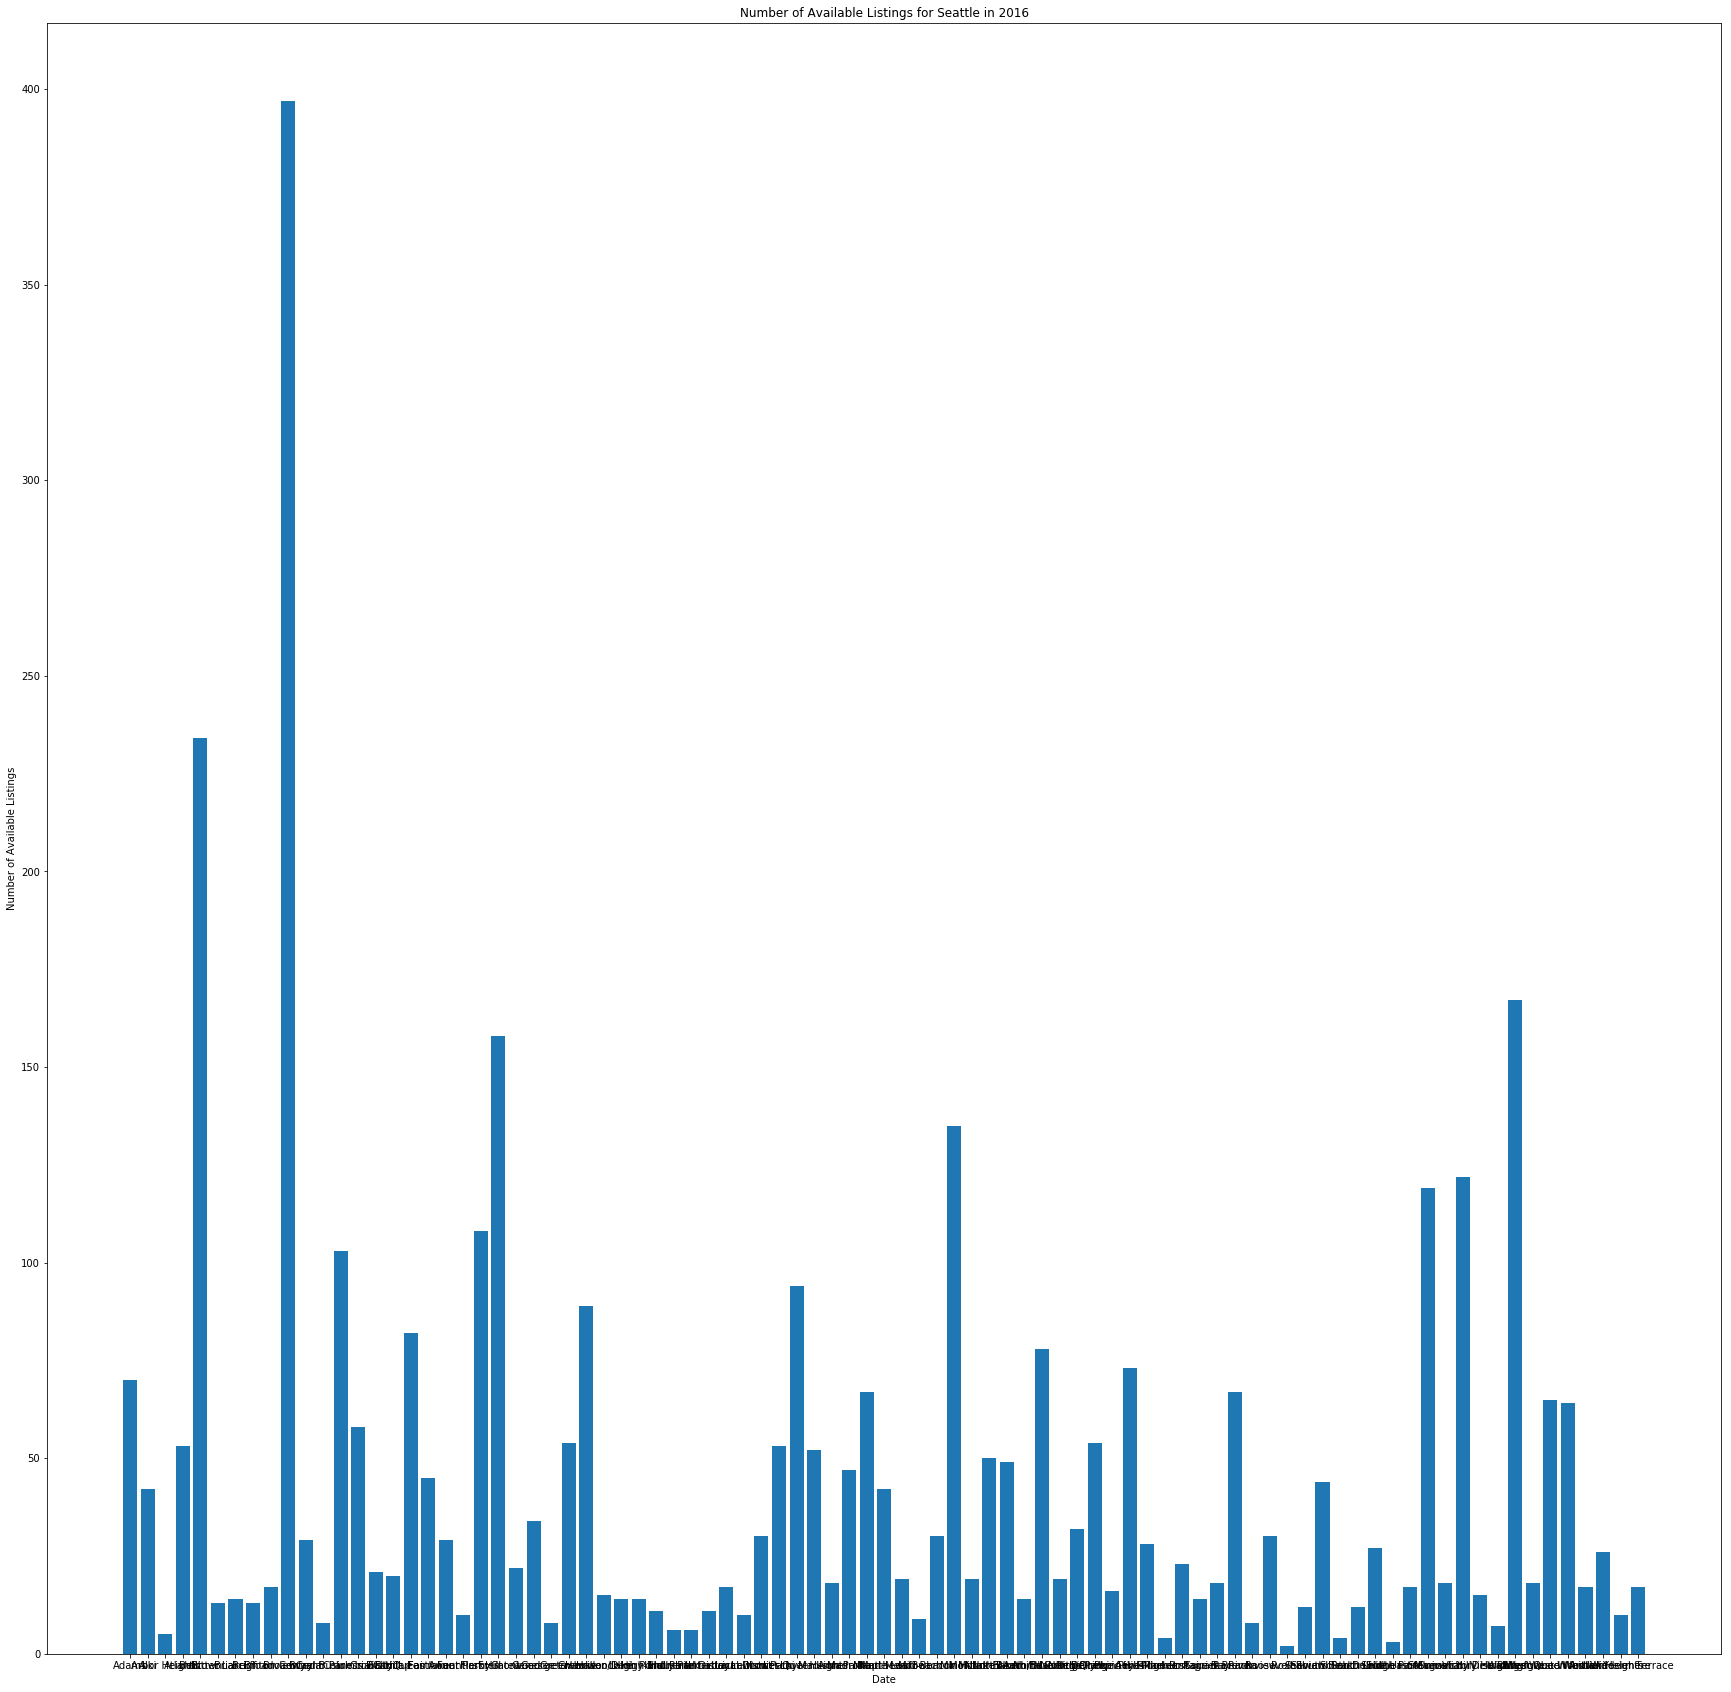

In [20]:
fig_num_listings_by_neighbourhood = plt.figure(figsize = (30, 30))
plt.bar(lis_by_neighbourhood['neighbourhood_cleansed'], lis_by_neighbourhood['id'])
plt.xlabel('Date')
plt.ylabel('Number of Available Listings')
plt.title('Number of Available Listings for Seattle in 2016')
plt.show()

In [67]:
# Create geometry column for listings
geometry = [Point(xy) for xy in zip(lis['longitude'], lis['latitude'])]
crs = {'init': 'epsg:4326'}
lis = gpd.GeoDataFrame(lis, crs = crs, geometry = geometry)

In [61]:
# From https://data.seattle.gov/Land-Base/2010-US-Census-Blocks/46cb-j9zb
shp = gpd.GeoDataFrame.from_file('data/raw/2010_US_Census_Blocks.shp')

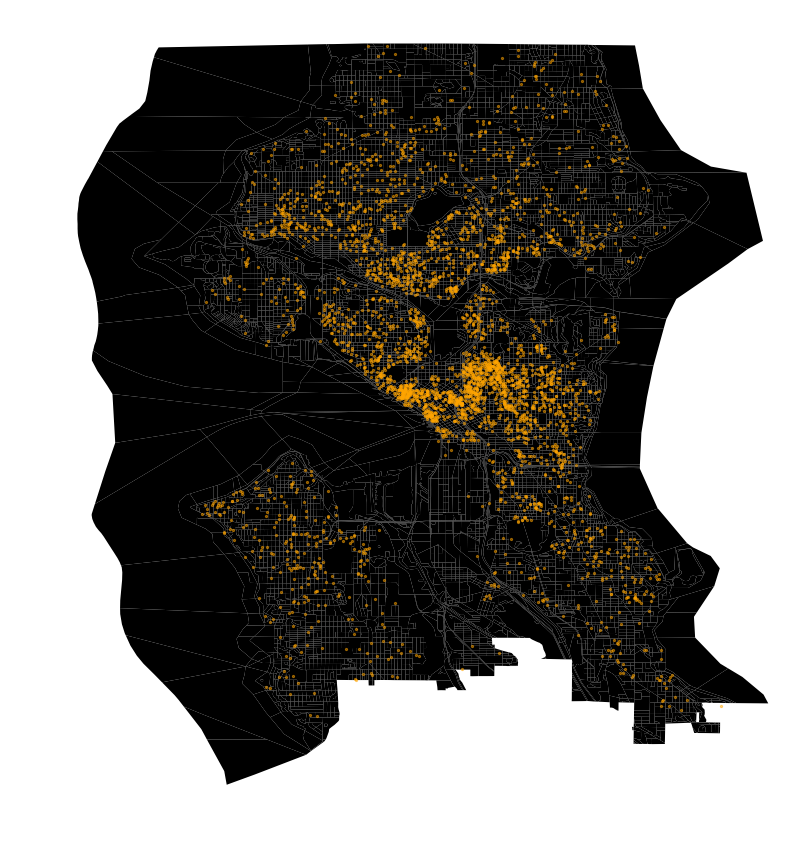

In [65]:
fig_map_seattle_listings, ax = plt.subplots(figsize = (15, 15))
base = shp.plot(ax = ax, color='black')
lis.plot(ax = base,
         marker = "o",
         color = 'orange',
         markersize = 5,
         alpha = 0.5)
_ = ax.axis('off')
plt.show()